Цель: изучить применение дерева решений в рамках задачи регрессии
Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.
Этапы работы:

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.
Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
Обучите модель регрессии на обучающем множестве.
Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.
Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

#def pred0(X,y, random_seed=33, model=None):
#  if model is None:
#      model = LinearRegression()
#  train_x, test_x, train_y , test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)
#  model.fit(train_x, train_y)
#  predictions = model.predict(test_x)
#  return predictions,train_x, test_x, train_y , test_y
def scoref(test_y, predictions):
  r2 = r2_score(test_y, predictions)
#  rmse = m.sqrt(mean_squared_error(test_y, predictions))
  return r2#,rmse
#def sc(test_y,trpr):
#  sc1 = tr_regs.score(test_y,trpr)
#  return sc1
def obuch (i):
  tr_regs = DecisionTreeRegressor(max_depth=i, random_state=10).fit(train_x, train_y)
  return tr_regs

In [ ]:
house = datasets.fetch_california_housing()
print(house.DESCR)
df1 = pd.DataFrame(house.data, columns=house.feature_names)
df1['MedHouseVal'] = house.target
print(df1.info())

In [ ]:
X0 = df1.copy()
y0 = pd.DataFrame(df1['MedHouseVal'])
del X0 ['MedHouseVal']
model = LinearRegression()
train_x, test_x, train_y , test_y = train_test_split(X0, y0, test_size = 0.2, random_state = 10)
model.fit(train_x, train_y)
predictions = model.predict(test_x)
skl = scoref(test_y,predictions)


In [ ]:
skl

0.6009790143129111

Дерево для визуализации

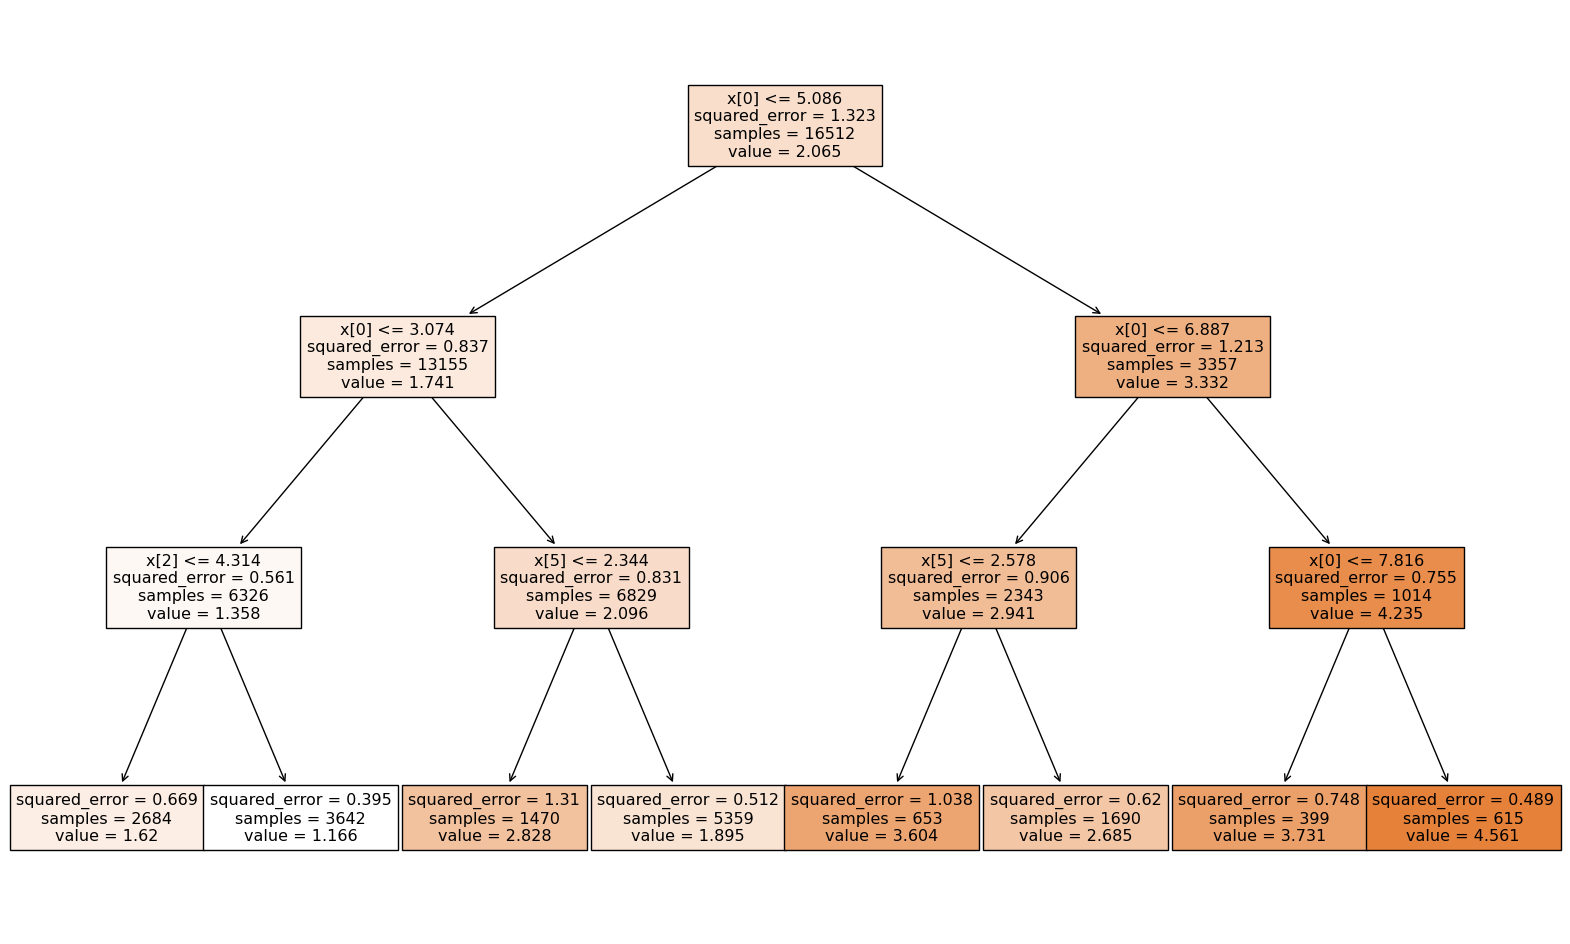

In [ ]:
tr_regsgr = DecisionTreeRegressor(max_depth=3, random_state=10).fit(train_x, train_y)
plt.figure(figsize=(20, 12))
plot_tree(tr_regsgr, filled=True);

In [ ]:

md = range(1,50,1)
if 'sk' in locals():
  del sk
sklist = []
for i in md:
  sk = scoref(test_y,obuch(i).predict(test_x))
  sklist.append(sk)
  #print(sk)

In [ ]:
m = max(sklist)
print("R2-score для LinearRegression = ", skl)
print("Оптимальное значение max_depth: \n",sklist.index(m) + 1, "\nПри нем значение R2-score: \n",m)


R2-score для LinearRegression =  0.6009790143129111
Оптимальное значение max_depth: 
 9 
При нем значение R2-score: 
 0.7219036069793761


Выводы:
* Модель построенная по дереву решений оказалась точнее чем через линейную регрессию.
* Плюс линейной модели в скорости обучения, как мне кажется она подойдет для предварительного построения для понимания возможности по исходным данным построить модель
* Плюс дерева решений в точности и в том что можно задать критерии остановки, подойдет больше для работы с изображениями

Дерево с оптимальным значением max_dapth, к сожалению в таком виде график не читаем(

In [ ]:
plt.figure(figsize=(100, 120))
plot_tree(obuch(9), filled=True)
#plt.savefig('foo.png')
plt.show()